<a href="https://colab.research.google.com/github/bartwronski/BlogPostsExtraMaterial/blob/master/PBR_textures_low_rank_part_1_toy_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage
import urllib.request
from zipfile import ZipFile

Simulating effects of YUV color space on decorrelating visibly correlated data

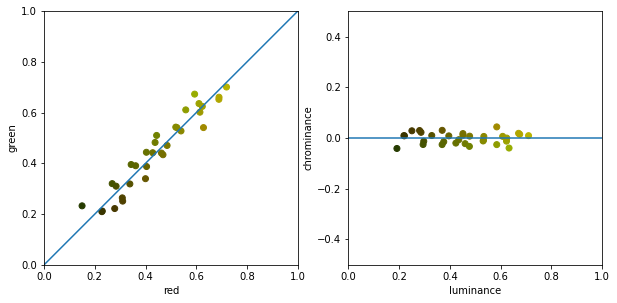

In [0]:
xs = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.05
ys = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.02

plt.rcParams['figure.figsize']=10,10
plt.subplot(1,2,1, aspect=1)
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())
plt.subplot(1,2,2, aspect=1)
xs_proj = 0.5 * xs + 0.5 * ys
ys_proj = 0.5 * xs - 0.5 * ys
plt.xlabel('luminance')
plt.xlim(0,1)
plt.ylabel('chrominance')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(0,1),np.zeros(50))

plt.scatter(xs_proj, ys_proj, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())



Simulated toy-problem effect of YUV like color space with non axis-aligned correlation

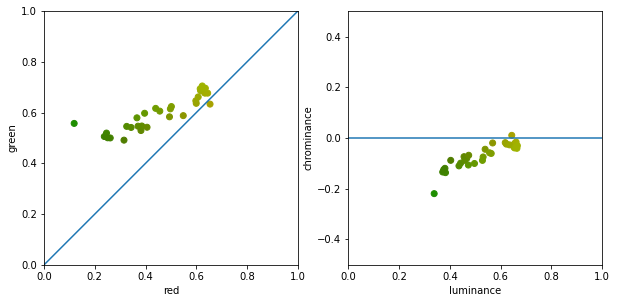

In [0]:
xs = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.05
ys = np.linspace(0.5, 0.7, 32) + np.random.normal(size=32)*0.02

plt.rcParams['figure.figsize']=10,10
plt.subplot(1,2,1, aspect=1)
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,2,2, aspect=1)
xs_proj = 0.5 * xs + 0.5 * ys
ys_proj = 0.5 * xs - 0.5 * ys
plt.xlabel('luminance')
plt.xlim(0,1)
plt.ylabel('chrominance')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(0,1),np.zeros(50))
plt.scatter(xs_proj, ys_proj, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())



Comparison between line fitting and SVD/PCA. 

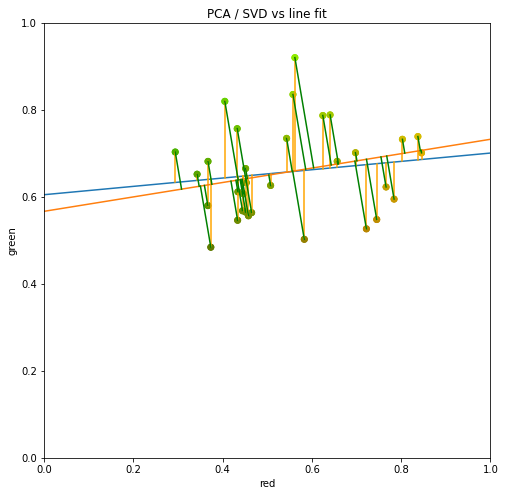

In [0]:
xs = np.linspace(0.3, 0.8, 32) + np.random.normal(size=32)*0.1
ys = np.linspace(0.6, 0.7, 32) + np.random.normal(size=32)*0.1

a, b = np.polyfit(xs, ys, 1)
plt.rcParams['figure.figsize']=8,8

plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())
plt.plot(np.linspace(0,1), a * np.linspace(0,1) + np.ones(50)*b)
for x,y in zip(xs, ys):
  # Plot lines between line fit and the original points.
  plt.plot([x,x], [y,x*a + b], color='orange')
# Here I used PCA (eigendecomposition of covariance matrix) instead of SVD; hopefully doesn't make it harder to understand, as one could use PCA as well.
evals, evecs = np.linalg.eig(np.cov(np.vstack((xs, ys))))
plt.title('PCA / SVD vs line fit')
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())
plt.plot(np.linspace(-1,1) * evecs[0,0] + xs.mean(), np.linspace(-1,1) * evecs[1,0] + ys.mean())
for x,y in zip(xs, ys):
  transformed = np.array([x-xs.mean(),y-ys.mean()]).dot(evecs)
  transformed[1] = 0
  transformed_back = transformed.dot(evecs.transpose())
  # Plot lines between projections and original points.
  plt.plot([x, transformed_back[0] + xs.mean()], [y, transformed_back[1] + ys.mean()], color='green')


First, naive approach at PCA - uncentered data.

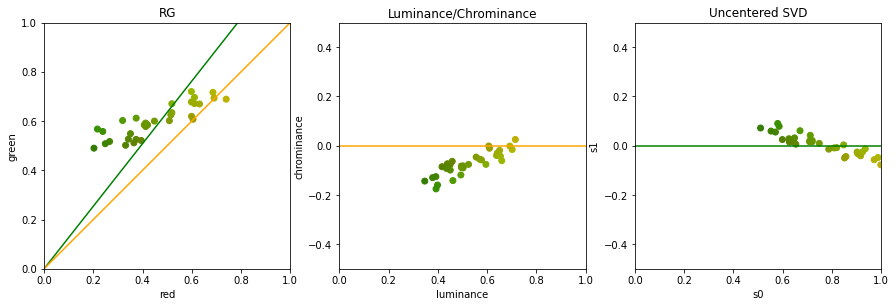

In [0]:
xs = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.05
ys = np.linspace(0.5, 0.7, 32) + np.random.normal(size=32)*0.02

u, s, t = np.linalg.svd(np.vstack((xs, ys)).transpose(), full_matrices=False)

plt.rcParams['figure.figsize']=15,15
plt.subplot(1,3,1, aspect=1)
plt.title('RG')
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.plot(np.linspace(-2,2) * t[0,0], np.linspace(-2,2) * t[0,1], 'green')
plt.plot(np.linspace(0,1), np.linspace(0,1), 'orange')
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,3,2, aspect=1)
xs_proj = 0.5 * xs + 0.5 * ys
ys_proj = 0.5 * xs - 0.5 * ys
plt.xlabel('luminance')
plt.title('Luminance/Chrominance')
plt.xlim(0,1)
plt.ylabel('chrominance')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(0,1),np.zeros(50), 'orange')
plt.scatter(xs_proj, ys_proj, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,3,3, aspect=1)
#print(u, s, t)
plt.title('Uncentered SVD')
plt.xlabel('s0')
plt.xlim(0.0,1.0)
plt.ylabel('s1')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(-1.5,1.5),np.zeros(50), 'green')
transformed = np.dot(u, np.diag(-s))
plt.scatter(transformed[:,0], 0.5 * transformed[:,1], c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())


The same, but this time done correctly - with centering.

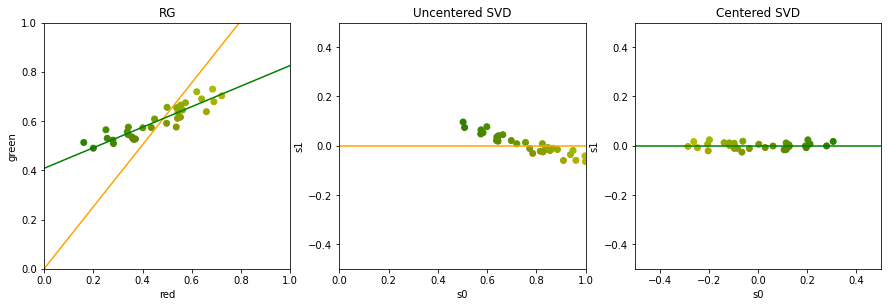

In [0]:
xs = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.05
ys = np.linspace(0.5, 0.7, 32) + np.random.normal(size=32)*0.02

u, s, t = np.linalg.svd(np.vstack((xs, ys)).transpose(), full_matrices=False)
u1, s1, t1 = np.linalg.svd(np.vstack((xs-xs.mean(), ys-ys.mean())).transpose(), full_matrices=False)


plt.rcParams['figure.figsize']=15,15
plt.subplot(1,3,1, aspect=1)
plt.title('RG')
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.plot(np.linspace(-2,2) * t[0,0], np.linspace(-2,2) * t[0,1], 'orange')
plt.plot(np.linspace(-2,2) * t1[0,0] + xs.mean(), np.linspace(-2,2) * t1[0,1] + ys.mean(), 'green')
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,3,2, aspect=1)
#print(u, s, t)
plt.title('Uncentered SVD')
plt.xlabel('s0')
plt.xlim(0.0,1.0)
plt.ylabel('s1')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(-1.5,1.5),np.zeros(50), 'orange')
transformed = np.dot(u, np.diag(-s))
plt.scatter(transformed[:,0], 0.5 * transformed[:,1], c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,3,3, aspect=1)
#print(u, s, t)
plt.title('Centered SVD')
plt.xlabel('s0')
plt.xlim(-0.5,0.5)
plt.ylabel('s1')
plt.ylim(-0.5,0.5)
plt.plot(np.linspace(-1.5,1.5),np.zeros(50), 'green')
transformed = np.dot(u1, np.diag(-s1))
plt.scatter(transformed[:,0], 0.5 * transformed[:,1], c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())



Demonstration of what the simplest block compression does to data.

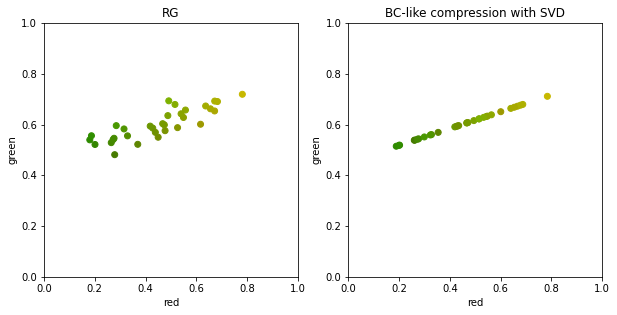

In [0]:
xs = np.linspace(0.2, 0.7, 32) + np.random.normal(size=32)*0.05
ys = np.linspace(0.5, 0.7, 32) + np.random.normal(size=32)*0.02

u1, s1, t1 = np.linalg.svd(np.vstack((xs-xs.mean(), ys-ys.mean())).transpose(), full_matrices=False)

plt.rcParams['figure.figsize']=10,10
plt.subplot(1,2,1, aspect=1)
plt.title('RG')
plt.xlim(0,1)
plt.xlabel('red')
plt.ylim(0,1)
plt.ylabel('green')
plt.scatter(xs, ys, c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())

plt.subplot(1,2,2, aspect=1)
#print(u, s, t)
plt.title('BC-like compression with SVD')
plt.xlabel('red')
plt.xlim(0.0,1.0)
plt.ylabel('green')
plt.ylim(0.0,1.0)
u1[:,1] = 0
transformed = np.dot(np.dot(u1, np.diag(s1)), t1)
plt.scatter(transformed[:,0] + xs.mean(), transformed[:,1]+ ys.mean(), c=np.vstack((xs,ys, np.zeros_like(xs), np.ones_like(xs))).transpose())